#### Import libraries

In [43]:
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn import linear_model

from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

####  Load data

In [44]:
df = pd.read_csv('ClientTrackExport-disabilities7.csv')
df.head()

,Age,HUDEthnicity,HUDRace,education,Alcohol Abuse,Chronic Health Condition,CountOfDisablingConditions,Developmental Disability,DisablingCondition,Drug Abuse,Felony Conviction,History of Foster Care,HIV/AIDS,Mental Health,Other,Physical Disability,ScoreTotal
0,63.0,O,C,1.0,1.0,1.0,5.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,1.0,4
1,68.0,O,C,NaN,NaN,1.0,2.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12
2,59.0,O,C,NaN,1.0,1.0,3.0,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,6
3,49.0,O,C,NaN,1.0,1.0,6.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,NaN,1.0,15
4,63.0,O,NaN,NaN,NaN,1.0,4.0,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,1.0,13


#### Extract X and y

In [45]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

#### Convert categorical data to numerical using one-hot encoder

In [46]:
ohe = OneHotEncoder()

##HUDEthnicity data
ethnicity = X.fillna('NA').iloc[:, [1]].values  
ethnicity_data = ohe.fit_transform(ethnicity).toarray()
ethnicity_df = pd.DataFrame(ethnicity_data)
ethnicity_df.columns = ohe.get_feature_names()
ethnicity_df.head()

,x0_8,x0_9,x0_99,x0_H,x0_O
0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,1.0


In [47]:
##HUDRace data
race = X.fillna('NA').iloc[:, [2]].values  
race_data = ohe.fit_transform(race).toarray()
race_df = pd.DataFrame(race_data)
race_df.columns = ohe.get_feature_names()
race_df.head()

,x0_A,x0_B,x0_C,x0_D,x0_E,x0_F,x0_H,x0_I,x0_J,x0_NA
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Scale all numeric data in rest of the columns of X

In [48]:
numeric_data = X.fillna(0).iloc[:, [0,3,4,5,6,7,8,9,10,11,12,13,14,15]].values
numeric_df = pd.DataFrame(numeric_data, dtype=object)
numeric_df.columns = ['Age', 'Education', 'Alcohol Abuse', 'Chronic Health Condition', 'CountOfDisablingConditions',
                      'Developmental Disability', 'DisablingCondition', 'Drug Abuse', 'Felony Conviction', 
                      'History of Foster Care', 'HIV/AIDS', 'Mental Health', 'Other', 'Physical Disability' ]
scaler = StandardScaler()
numeric_df = scaler.fit_transform(numeric_df)
numeric_df = pd.DataFrame(numeric_df)

#### Combine all X data into one frame

In [49]:
X_df = pd.concat([ethnicity_df, numeric_df], axis = 1)
X_df.head()

,x0_8,x0_9,x0_99,x0_H,x0_O,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.0,0.0,0.0,0.0,1.0,0.998064,2.009901,0.926680,0.585819,0.758832,-0.546536,0.266903,0.872992,-1.240190,-0.429923,-0.201452,0.540361,-0.253764,1.038750
1,0.0,0.0,0.0,0.0,1.0,1.388558,-0.151283,-1.079121,0.585819,-0.846030,-0.546536,0.266903,0.872992,-1.240190,-0.429923,-0.201452,-1.850616,-0.253764,-0.962695
2,0.0,0.0,0.0,0.0,1.0,0.685669,-0.151283,0.926680,0.585819,-0.311076,-0.546536,0.266903,-1.145486,0.806328,-0.429923,-0.201452,-1.850616,-0.253764,1.038750
3,0.0,0.0,0.0,0.0,1.0,-0.095320,-0.151283,0.926680,0.585819,1.293786,1.829707,0.266903,-1.145486,0.806328,2.325996,4.963973,0.540361,-0.253764,1.038750
4,0.0,0.0,0.0,0.0,1.0,0.998064,-0.151283,-1.079121,0.585819,0.223878,-0.546536,0.266903,0.872992,0.806328,-0.429923,-0.201452,0.540361,-0.253764,1.038750


#### Correlation heatmap

<AxesSubplot:>

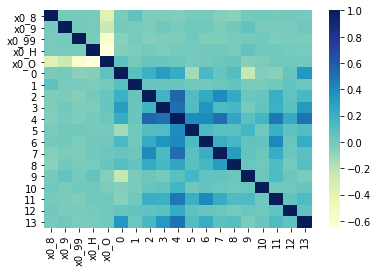

In [50]:
sb.heatmap(X_df.corr(), cmap="YlGnBu")

In [51]:
X_df = X_df.drop(X_df.columns[9], axis = 1) #drop CountOfDisablingConditions as it shows high correlation with others

<AxesSubplot:>

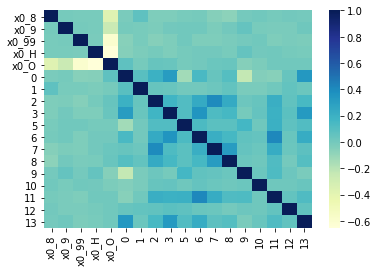

In [52]:
sb.heatmap(X_df.corr(), cmap="YlGnBu")

#### Analyze y

<AxesSubplot:xlabel='ScoreTotal', ylabel='count'>

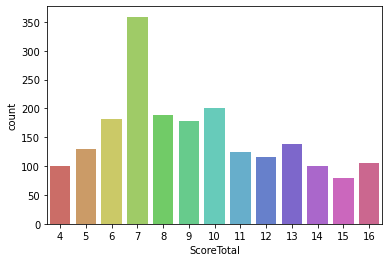

In [53]:
sb.countplot( x= 'ScoreTotal', data=df, palette='hls')

#### Split training and test data

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X_df.fillna(0), y, test_size=0.6, random_state=0)

In [55]:
X_train.describe()

,x0_8,x0_9,x0_99,x0_H,x0_O,0,1,2,3,5,6,7,8,9,10,11,12,13
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,0.003750,0.003750,0.010000,0.022500,0.960000,0.013823,0.005403,0.009026,-0.013184,0.008911,-0.004014,-0.002523,-0.017395,0.014469,-0.007748,-0.003586,0.024118,0.003002
std,0.061161,0.061161,0.099561,0.148396,0.196082,1.012599,0.990394,0.999896,1.007908,1.006291,1.007581,1.000966,1.004244,1.014155,0.981960,1.002967,1.043888,1.000735
min,0.000000,0.000000,0.000000,0.000000,0.000000,-2.516383,-0.151283,-1.079121,-1.707013,-0.546536,-3.746678,-1.145486,-1.240190,-0.429923,-0.201452,-1.850616,-0.253764,-0.962695
25%,0.000000,0.000000,0.000000,0.000000,1.000000,-0.720110,-0.151283,-1.079121,-1.707013,-0.546536,0.266903,-1.145486,-1.240190,-0.429923,-0.201452,0.540361,-0.253764,-0.962695
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.217076,-0.151283,0.926680,0.585819,-0.546536,0.266903,0.872992,0.806328,-0.429923,-0.201452,0.540361,-0.253764,-0.962695
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.841866,-0.151283,0.926680,0.585819,-0.546536,0.266903,0.872992,0.806328,-0.429923,-0.201452,0.540361,-0.253764,1.038750
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.560040,8.493452,0.926680,0.585819,1.829707,0.266903,0.872992,0.806328,2.325996,4.963973,0.540361,3.940676,1.038750


In [56]:
y_train.describe()

count    800.000000
mean       9.330000
std        3.420266
min        4.000000
25%        7.000000
50%        9.000000
75%       12.000000
max       16.000000
Name: ScoreTotal, dtype: float64

In [57]:
print(X_train.shape)
print(y_train.shape)

(800, 18)
(800,)


#### Train model: Ordinal Logistic regression using LogisticAT (All-Threshold variant) 
###### Ref: https://pythonhosted.org/mord/reference.html#mord.LogisticAT 

In [58]:
#!pip3 install mord   

In [59]:
#https://medium.datadriveninvestor.com/logistic-regression-simple-multinomial-and-ordinal-b2bc886bb974 
import mord
from mord import LogisticAT

regressor = LogisticAT(alpha=1.0, verbose=0)
regressor.fit(X_train, y_train)
y_predict = regressor.predict(X_test)

In [60]:
print('Training accuracy:', regressor.score(X_train, y_train))
print('Test accuracy:', regressor.score(X_test, y_test))

print("Recall:",recall_score(y_test,y_predict, average='micro'))
print("Precision:",precision_score(y_test,y_predict, average='micro'))
print("F1 Score:",f1_score(y_test,y_predict, average='micro'))
print("Accuracy Score:", accuracy_score(y_test,y_predict))

Training accuracy: -2.5075
Test accuracy: -2.445
Recall: 0.13166666666666665
Precision: 0.13166666666666665
F1 Score: 0.13166666666666665
Accuracy Score: 0.13166666666666665


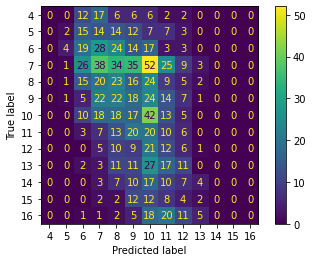

In [61]:
cm = confusion_matrix(y_test, y_predict)
cmd_obj = ConfusionMatrixDisplay(cm, display_labels = [4,5,6,7,8,9,10,11,12,13,14,15,16])
cmd_obj.plot()